# Prompt Improvement Service – Metrics Analysis

This notebook measures how much your **prompt‑improvement service** boosts prompt quality.

It expects **two CSV files**—one for *image‑generation* prompts and one for *chat* prompts—each with
two columns:

1. `original_prompt`
2. `improved_prompt`

> **Tip:** If your schema or file type is different, edit the *Load data* cell.

## 1. Setup

In [26]:
# Uncomment the next line on a fresh environment
# !pip install pandas numpy matplotlib tqdm textstat tiktoken scikit-learn scipy
from scipy.stats import linregress   # handy for slope, intercept & r-value
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
from prompt_rating import PromptRatingHandler, InputTypes
import textstat              # readability scores
import tiktoken              # token counts
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import ttest_ind
promptRatingService = PromptRatingHandler()
plt.rcParams['figure.figsize'] = (9, 4)
plt.rcParams['figure.dpi'] = 110
plt.rcParams['axes.grid'] = True


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Евгений\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Евгений\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Евгений\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Евгений\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Евгений\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Евгений\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset 

## 2. Load your prompt datasets

In [21]:

SINGULAR_PROMPTS = Path('./datasets/image_generation_prompts.csv')


only_singular_prompts_df = pd.read_csv(SINGULAR_PROMPTS)


In [22]:
DatasetOfRatings = pd.DataFrame(columns=['prompt', 'rating'])
for entry in only_singular_prompts_df['prompt']:
    rating = promptRatingService.calculate(entry, ai_type=InputTypes.SD)
    DatasetOfRatings.loc[len(DatasetOfRatings)] = [entry, rating]
print(DatasetOfRatings.head(10))
    

simple mountain landscape
-0.00166351606805293
mind-blowing mountain landscape
-0.0017139256458727158
mind-blowing desert caravan
-0.0011090107120352868
mind-blowing cyber samurai
5.040957781978579e-05
highly detailed robot
-0.0005545053560176434
photo-realistic forest waterfall
-0.0011090107120352868
epic mountain landscape
-0.0010586011342155009
colorful ancient temple
-0.0014114681789540013
epic mountain landscape
-0.0010586011342155009
vibrant forest waterfall
-0.0011090107120352868
highly detailed ancient temple
-0.0011090107120352868
vibrant cat
-0.0003528670447385003
photo-realistic floating island
-0.0008065532451165721
highly detailed robot
-0.0005545053560176434
photo-realistic astronaut
-0.0003528670447385003
highly detailed mountain landscape
-0.0015122873345935729
hyper-realistic floating island
-0.0008065532451165721
photo-realistic robot
-0.0007561436672967864
ultra-detailed robot
-0.0007561436672967864
vibrant floating island
-0.0008065532451165721
hyper-realistic fores

## 2. add an explicit “position” variable

In [23]:
DatasetOfRatings.reset_index(drop=True, inplace=True)
DatasetOfRatings["position"] = DatasetOfRatings.index + 1  
corr = DatasetOfRatings["position"].corr(DatasetOfRatings["rating"])
print(f"Pearson r = {corr:.3f}")

Pearson r = 0.809


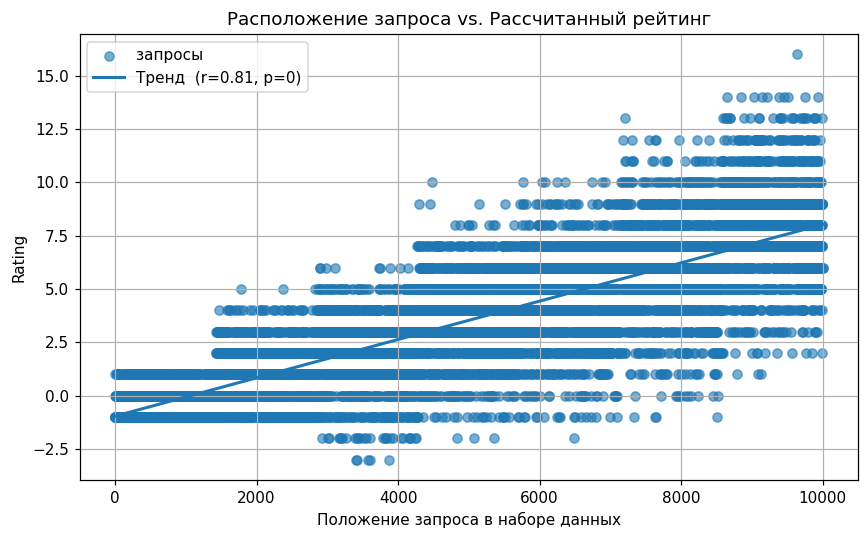

In [ ]:
import matplotlib.pyplot as plt

x = DatasetOfRatings["position"]
y = DatasetOfRatings["rating"]

slope, intercept, r, p, _ = linregress(x, y)
y_fit = intercept + slope * x

plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.6, label="запросы")
plt.plot(x, y_fit, linewidth=2, label=f"Тренд  (r={r:.2f}, p={p:.3g})")
plt.title("Расположение запроса vs. Рассчитанный рейтинг")
plt.xlabel("Положение запроса в наборе данных")
plt.ylabel("Рейтинг")
plt.legend()
plt.tight_layout()
plt.show()
